We have seen that linear methods are not that great on the data of week 2. Thus we try out different neural networks.


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

battery = pd.read_csv('Final Database.csv')
battery = battery.drop(columns="Unnamed: 0")
battery.dtypes

# Assuming 'battery' is your DataFrame containing the dataset

# Features (X)
X = battery.drop(columns=['RUL'])

# Target variable (y)
y = battery['RUL']

# Now you can split X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
mse_ann = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error (ANN):", mse_ann)


2024-02-17 17:35:41.761842: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-17 17:35:41.829354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-17 17:35:41.829368: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (5.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Epoch 1/50


2024-02-17 17:35:43.976051: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-17 17:35:43.976073: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (strawberry): /proc/driver/nvidia/version does not exist
2024-02-17 17:35:43.976610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


302/302 [==============================] - 1s 2ms/step - loss: 4542354.0000 - val_loss: 3617085.7500
Epoch 2/50
302/302 [==============================] - 0s 978us/step - loss: 1901221.8750 - val_loss: 3718637.5000
Epoch 3/50
302/302 [==============================] - 0s 972us/step - loss: 2079327.3750 - val_loss: 3840188.5000
Epoch 4/50
302/302 [==============================] - 0s 959us/step - loss: 1042793.5000 - val_loss: 243555.5156
Epoch 5/50
302/302 [==============================] - 0s 1ms/step - loss: 559926.6250 - val_loss: 821365.0625
Epoch 6/50
302/302 [==============================] - 0s 960us/step - loss: 284212.3125 - val_loss: 207621.2188
Epoch 7/50
302/302 [==============================] - 0s 975us/step - loss: 966277.5000 - val_loss: 687310.8750
Epoch 8/50
302/302 [==============================] - 0s 1ms/step - loss: 233617.3125 - val_loss: 205213.9688
Epoch 9/50
302/302 [==============================] - 0s 957us/step - loss: 218510.4688 - val_loss: 104595.4453
Ep

The MSE here is 18520 and was 24302.80969818099 for linear methods.
We next test whether the model is overfitted.
If the training loss decreases while validation stays on a plateu we assume overfitting 

Epoch 1/50
302/302 [==============================] - 0s 1ms/step - loss: 18086.5469 - val_loss: 60467.2109
Epoch 2/50
302/302 [==============================] - 0s 1ms/step - loss: 13532.1162 - val_loss: 63192.7617
Epoch 3/50
302/302 [==============================] - 0s 1ms/step - loss: 11789.0664 - val_loss: 49288.4453
Epoch 4/50
302/302 [==============================] - 0s 1ms/step - loss: 11631.6484 - val_loss: 52553.7734
Epoch 5/50
302/302 [==============================] - 0s 1ms/step - loss: 10388.6270 - val_loss: 42631.1836
Epoch 6/50
302/302 [==============================] - 0s 1ms/step - loss: 10254.8545 - val_loss: 45448.6055
Epoch 7/50
302/302 [==============================] - 0s 1ms/step - loss: 36210.9609 - val_loss: 48451.6680
Epoch 8/50
302/302 [==============================] - 0s 1ms/step - loss: 14469.4170 - val_loss: 44961.1836
Epoch 9/50
302/302 [==============================] - 0s 1ms/step - loss: 10126.5986 - val_loss: 37565.2695
Epoch 10/50
302/302 [=======

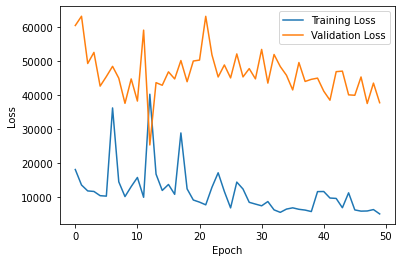

In [5]:
import matplotlib.pyplot as plt

# Train the model
history = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to build the model
def build_model(units_input=64, reg_rate=0.001, num_layers=2, units_hidden=64, dropout=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units_input, activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=tf.keras.regularizers.l2(reg_rate)))

    # Adding additional hidden layers
    for _ in range(num_layers):
        model.add(Dense(units=units_hidden, activation='relu',
                        kernel_regularizer=tf.keras.regularizers.l2(reg_rate)))
        model.add(Dropout(rate=dropout))

    model.add(Dense(1))  # Output layer with a single neuron for regression

    model.compile(optimizer=Adam(learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    
    return model

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'units_input': [32, 64, 128],
    'reg_rate': [0.01, 0.001, 0.0001],
    'num_layers': [1, 2, 3],
    'units_hidden': [32, 64, 128],
    'dropout': [0.1, 0.2, 0.3],
    'learning_rate': [0.01, 0.001, 0.0001]
}

# Create the model
model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=50, batch_size=32, verbose=0)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2,
                                   random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Build the model with the best hyperparameters and train it
best_model = build_model(**best_params)
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model
y_pred = best_model.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (ANN):", mse_ann)


/tmp/ipykernel_31031/4030316440.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=50, batch_size=32, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END dropout=0.2, learning_rate=0.0001, num_layers=3, reg_rate=0.001, units_hidden=32, units_input=32; total time=  12.5s
[CV] END dropout=0.2, learning_rate=0.0001, num_layers=3, reg_rate=0.001, units_hidden=32, units_input=32; total time=  11.9s
[CV] END dropout=0.2, learning_rate=0.0001, num_layers=3, reg_rate=0.001, units_hidden=32, units_input=32; total time=  12.4s
[CV] END dropout=0.1, learning_rate=0.001, num_layers=3, reg_rate=0.001, units_hidden=64, units_input=64; total time=  13.4s
[CV] END dropout=0.1, learning_rate=0.001, num_layers=3, reg_rate=0.001, units_hidden=64, units_input=64; total time=  13.2s
[CV] END dropout=0.1, learning_rate=0.001, num_layers=3, reg_rate=0.001, units_hidden=64, units_input=64; total time=  12.7s
[CV] END dropout=0.2, learning_rate=0.01, num_layers=3, reg_rate=0.01, units_hidden=64, units_input=128; total time=  13.1s
[CV] END dropout=0.2, learning_rate=0.01, num_layers=3, reg_ra